In [227]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import exp
import warnings
warnings.filterwarnings("ignore")

In [228]:
data=pd.read_csv("/content/BankNote_Authentication.csv")

In [229]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [230]:
data.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [232]:
data["class"].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64>

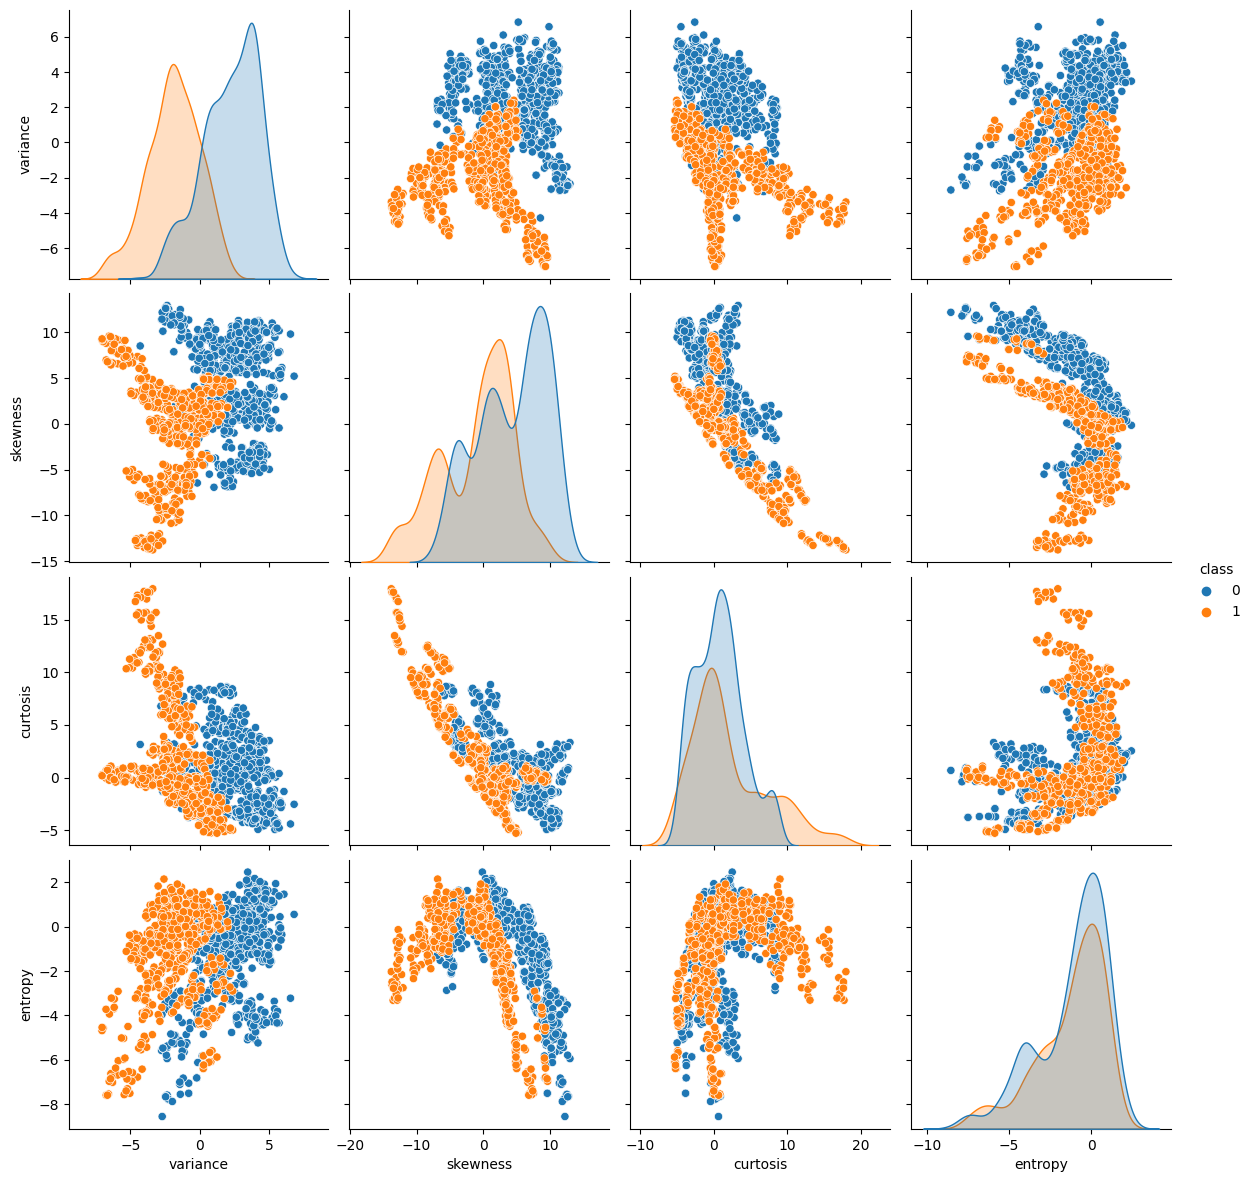

In [233]:
#data distribution
sns.pairplot(data, hue="class", height=3, diag_kind="kde")
plt.show(sns)


In [234]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,shuffle=True)

In [235]:
x_train=[]
y_train=[]
for i in range(0,len(train)):
    x_train.append([train.values[i,0],train.values[i,1],train.values[i,2],train.values[i,3]])
    if train.values[i,4]== 0:
        y_train.append([0])
    else:
        y_train.append([1])

In [236]:
#scaling
sc = StandardScaler()
sc.fit(x_train)
xtrain=sc.transform(x_train)









   Input values before and after Scaling


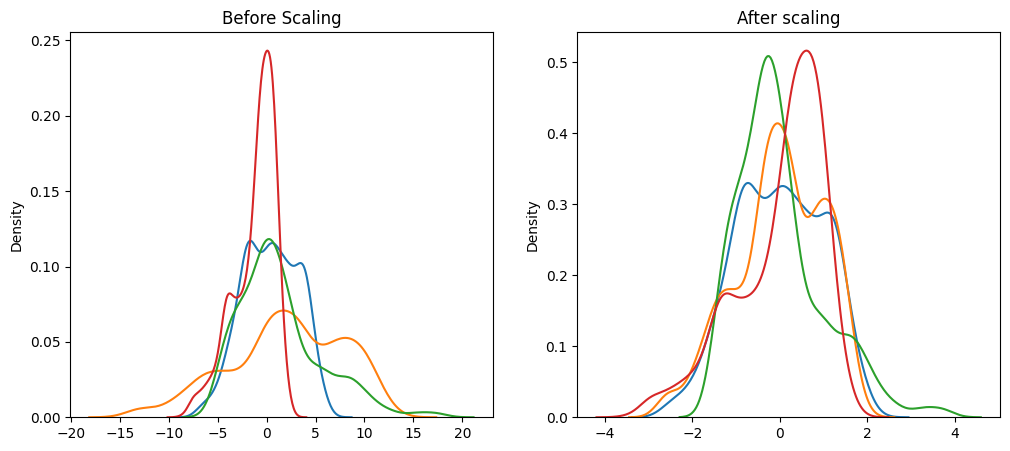

In [237]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After scaling')
print("\n\n\n\n\n\n\n\n   Input values before and after Scaling")
label_names=['varience','skewness','curtosis','entropy']
for i in range(0,4):
    t1=[]
    t2=[]
    for row1 in x_train:
        t1.append(row1[i])
    for row2 in xtrain:
        t2.append(row2[i])
    sns.kdeplot(t1,ax=ax1,label=label_names[i])
    sns.kdeplot(t2,ax=ax2,label=label_names[i])
plt.show()

updated weights1 =  [[0.54309113 0.27770247 0.42450742 0.84432447 0.00329572 0.12154184]
 [0.67055298 0.82543587 0.13670023 0.5748112  0.8904325  0.20918507]
 [0.18539046 0.10850921 0.21969951 0.97871327 0.81196529 0.17194642]
 [0.81621448 0.27405208 0.43170385 0.94001495 0.81760292 0.33611106]]
updated weights2 =  [[0.17083325]
 [0.36928216]
 [0.00269709]
 [0.24611514]
 [0.79252361]
 [0.01295234]]
updated weights1 =  [[0.5427855  0.27704192 0.42450259 0.84388411 0.00187821 0.12151867]
 [0.67036199 0.82502296 0.13669722 0.57453612 0.88954657 0.20917059]
 [0.18545108 0.10864026 0.21970047 0.97880053 0.81224632 0.17195102]
 [0.81620449 0.27403062 0.43170369 0.94000046 0.81755666 0.33611031]]
updated weights2 =  [[ 1.66256935e-01]
 [ 3.65734599e-01]
 [-2.94843850e-04]
 [ 2.39805269e-01]
 [ 7.89387265e-01]
 [ 1.06493406e-02]]
updated weights1 =  [[5.42488062e-01 2.76387711e-01 4.24503118e-01 8.43455035e-01
  4.66308779e-04 1.21499622e-01]
 [6.70176116e-01 8.24614021e-01 1.36697546e-01 5.74

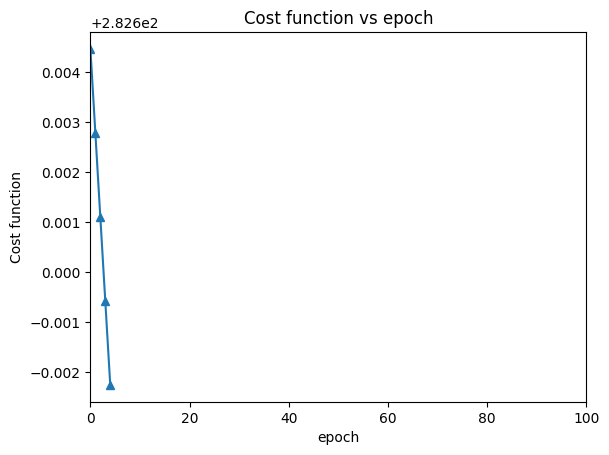

In [238]:
class NeuralNet:
    def __init__(self,x,y,lr,epoch,k0,k1,b1,b2):
        np.random.seed(100)
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],6) 
        self.weights2   = np.random.rand(6,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.lr         = lr
        self.epoch      = epoch
        self.b1         = b1
        self.b2         = b2
        self.costlist   = []
        self.k0         = k0
        self.k1         = k1

    def softmax(self,x):
        e = exp(x)
        return e / e.sum()
    
    def derived_acf(self,x): 
        val = self.k0 +self.k1 * x  
        return val   

    def cost(self,y_target,y_output):
        return 0.5*np.sum(np.square(np.subtract(y_target,y_output)))
    
    def feedforward(self):
        self.layer1 = self.softmax((np.dot(self.input,self.weights1)+self.b1))
        self.output = self.derived_acf((np.dot(self.layer1,self.weights2)+self.b2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, ((self.y - self.output) * self.derived_acf(self.output)))
        d_weights1 = np.dot(self.input.T,(np.dot((self.y - self.output) * self.derived_acf(self.output), self.weights2.T) * self.softmax(self.layer1)))

        # update the weights with the derivative (slope) of the cost function
        self.weights1 += d_weights1 * self.lr
        self.weights2 += d_weights2 * self.lr 
        print("updated weights1 = ",self.weights1)
        print("updated weights2 = ",self.weights2)

    def train(self):
        for i in range (self.epoch):
          self.feedforward()
          self.backprop()
          self.costlist.append(self.cost(self.y,self.output))
            
    def predict(self,input_data):
        self.input=input_data
        self.feedforward()
        return self.output

if __name__ == "__main__":
  nn = NeuralNet(x=xtrain,y=np.array(y_train),lr=0.03,epoch=5,k0=0.5,k1=0.5,b1=1,b2=1)
  nn.train()
  nn.backprop()
  y_predtrain=[]
  for i in xtrain:
    ypretrain=nn.predict(i)
    if ypretrain.all()<=0.005:
      y_predtrain.append(0)
    else:
      y_predtrain.append(1)
    

  ##Plotting the cost vs epoch
  ep=[]
  for i in range (0,len(nn.costlist)):
      ep.append(i)
  plt.plot(ep,nn.costlist,marker = '^')
  plt.xlabel('epoch')
  plt.ylabel('Cost function')
  plt.title("Cost function vs epoch")
  plt.xlim((0,100))
  plt.show()
                

In [239]:
#testing
x_test=[]
y_test=[]
for i in range(0,len(test)):
    x_test.append([test.values[i,0],test.values[i,1],test.values[i,2],test.values[i,3]])
    if test.values[i,4]== 0 :
        y_test.append([0])
    else:
        y_test.append([1])

In [240]:
#scaling
sc = StandardScaler()
sc.fit(x_test)
xtest=sc.transform(x_test)

updated weights1 =  [[0.54308254 0.27768444 0.42450714 0.84431202 0.00325742 0.1215411 ]
 [0.67056052 0.82545178 0.13670048 0.57482219 0.89046688 0.20918573]
 [0.18541389 0.10855906 0.21970027 0.97874689 0.81207128 0.17194846]
 [0.81621521 0.27405389 0.43170388 0.94001586 0.81760645 0.33611113]]
updated weights2 =  [[0.17071534]
 [0.36916233]
 [0.00255472]
 [0.24630496]
 [0.7925708 ]
 [0.01283435]]
updated weights1 =  [[0.54276877 0.27700624 0.42450245 0.84385917 0.00180169 0.12151753]
 [0.670377   0.82505476 0.13669773 0.57455762 0.88961512 0.20917194]
 [0.18549728 0.10873944 0.21970152 0.97886701 0.8124579  0.17195472]
 [0.81620593 0.27403424 0.43170374 0.94000225 0.8175637  0.33611044]]
updated weights2 =  [[ 1.66021182e-01]
 [ 3.65495007e-01]
 [-5.79605794e-04]
 [ 2.40185011e-01]
 [ 7.89481899e-01]
 [ 1.04133588e-02]]
updated weights1 =  [[5.42463637e-01 2.76334790e-01 4.24503511e-01 8.43417586e-01
  3.51655986e-04 1.21498403e-01]
 [6.70198530e-01 8.24661685e-01 1.36698355e-01 5.74

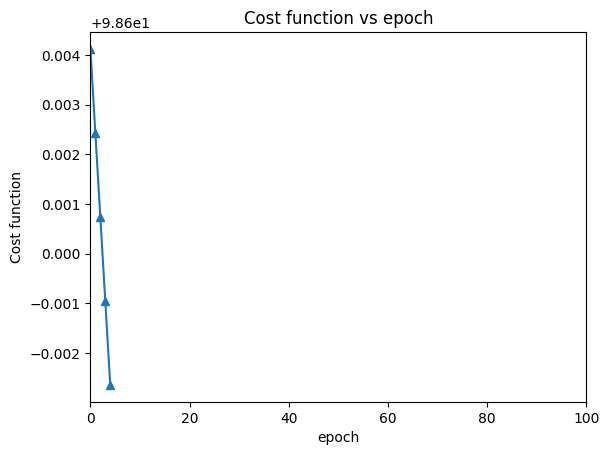

In [247]:
if __name__ == "__main__":
  nn = NeuralNet(x=xtest,y=np.array(y_test),lr=0.03,epoch=5,k0=0.5,k1=0.5,b1=1,b2=1)
  nn.train()
  nn.backprop()
  y_pred=[]
  for i in xtest:
    ypre=nn.predict(i)
    if ypre.all()<=0.005:
      y_pred.append(0)
    else:
      y_pred.append(1)
  
  ep=[]
  for i in range (0,len(nn.costlist)):
      ep.append(i)
  plt.plot(ep,nn.costlist,marker = '^')
  plt.xlabel('epoch')
  plt.ylabel('Cost function')
  plt.title("Cost function vs epoch")
  plt.xlim((0,100))
  plt.show()

In [248]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.43      1.00      0.60       146

    accuracy                           0.43       343
   macro avg       0.21      0.50      0.30       343
weighted avg       0.18      0.43      0.25       343



In [249]:
print(classification_report(y_train,y_predtrain))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       565
           1       0.45      1.00      0.62       464

    accuracy                           0.45      1029
   macro avg       0.23      0.50      0.31      1029
weighted avg       0.20      0.45      0.28      1029

